In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import normalize

In [14]:
diabetes = pd.read_csv('train.csv')

In [16]:
diabetes.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [37]:
diabetes.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [17]:
positive = diabetes[diabetes['diabetes'] == 1]
negative = diabetes[diabetes['diabetes'] == 0]

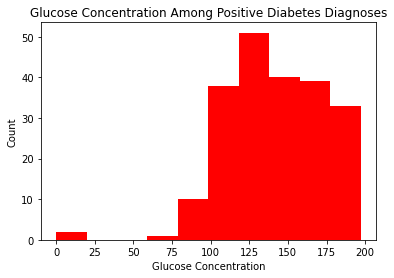

In [44]:
plt.hist(positive['glucose_concentration'], color='red')
plt.title('Glucose Concentration Among Positive Diabetes Diagnoses')
plt.xlabel('Glucose Concentration')
plt.ylabel('Count')
plt.show()

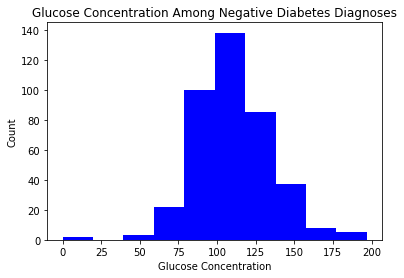

In [45]:
plt.hist(negative['glucose_concentration'], color='blue')
plt.title('Glucose Concentration Among Negative Diabetes Diagnoses')
plt.xlabel('Glucose Concentration')
plt.ylabel('Count')
plt.show()

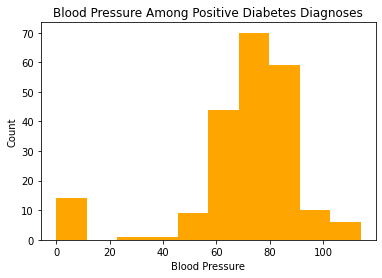

In [46]:
plt.hist(positive['blood_pressure'], color='orange')
plt.title('Blood Pressure Among Positive Diabetes Diagnoses')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

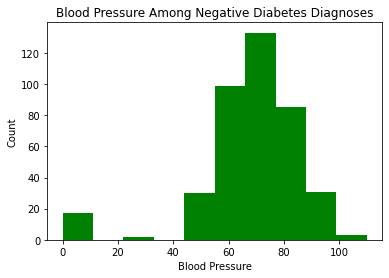

In [49]:
plt.hist(negative['blood_pressure'], color='green')
plt.title('Blood Pressure Among Negative Diabetes Diagnoses')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

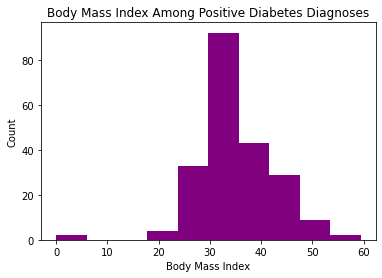

In [48]:
plt.hist(positive['bmi'], color='purple')
plt.title('Body Mass Index Among Positive Diabetes Diagnoses')
plt.xlabel('Body Mass Index')
plt.ylabel('Count')
plt.show()

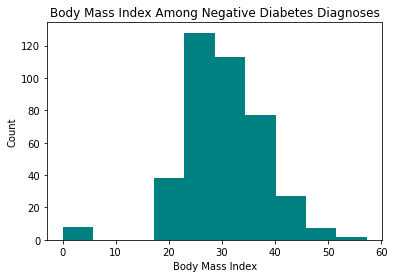

In [51]:
plt.hist(negative['bmi'], color='teal')
plt.title('Body Mass Index Among Negative Diabetes Diagnoses')
plt.xlabel('Body Mass Index')
plt.ylabel('Count')
plt.show()
plt.show()

In [19]:
norm_pos = preprocessing.normalize(positive[['no_times_pregnant', 'glucose_concentration', 'blood_pressure', 'skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree', 'age']], axis=0)

norm_pos = pd.DataFrame(norm_pos)
norm_pos.rename(columns={0:'no_times_pregnant', 1:'glucose_concentration', 2:'blood_pressure', 3:'skin_fold_thickness', 4:'serum_insulin', 5:'bmi', 6:'diabetes pedigree', 7:'age'}, inplace=True)
norm_pos.head()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,0.123416,0.067818,0.086640,0.082506,0.058060,0.070109,0.026335,0.090507
1,0.022439,0.044105,0.058989,0.080006,0.063628,0.072791,0.069882,0.040817
2,0.033659,0.060704,0.066362,0.062504,0.075558,0.062064,0.056922,0.047916
3,0.033659,0.091530,0.064519,0.077506,0.000000,0.066853,0.024988,0.044366
4,0.056098,0.064972,0.099544,0.000000,0.000000,0.093479,0.023536,0.065662


In [20]:
norm_neg = preprocessing.normalize(negative[['no_times_pregnant', 'glucose_concentration', 'blood_pressure', 'skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree', 'age']], axis=0)

norm_neg = pd.DataFrame(norm_pos)
norm_neg.rename(columns={0:'no_times_pregnant', 1:'glucose_concentration', 2:'blood_pressure', 3:'skin_fold_thickness', 4:'serum_insulin', 5:'bmi', 6:'diabetes pedigree', 7:'age'}, inplace=True)
norm_neg.head()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,0.123416,0.067818,0.086640,0.082506,0.058060,0.070109,0.026335,0.090507
1,0.022439,0.044105,0.058989,0.080006,0.063628,0.072791,0.069882,0.040817
2,0.033659,0.060704,0.066362,0.062504,0.075558,0.062064,0.056922,0.047916
3,0.033659,0.091530,0.064519,0.077506,0.000000,0.066853,0.024988,0.044366
4,0.056098,0.064972,0.099544,0.000000,0.000000,0.093479,0.023536,0.065662


In [22]:
res_gluc = stats.ttest_ind(norm_pos['glucose_concentration'], norm_neg['glucose_concentration'])
display(res_gluc)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [23]:
res_bp = stats.ttest_ind(norm_pos['blood_pressure'], norm_neg['blood_pressure'])
display(res_bp)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [26]:
res_bmi = stats.ttest_ind(norm_pos['bmi'], norm_neg['bmi'])
display(res_bmi)

Ttest_indResult(statistic=0.0, pvalue=1.0)